### Imports

In [1]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(19)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

from keras import backend as K
K.set_image_dim_ordering('th')
from keras.utils import np_utils
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
%matplotlib inline

/home/whale/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Load MNIST

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Preprocessing

In [3]:
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

### F1-score

In [13]:
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### Model

In [14]:
def baseline_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss = keras.losses.categorical_crossentropy, 
                  optimizer = keras.optimizers.Adadelta(), 
                  metrics=['accuracy', f1])
    return model

In [18]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 200, verbose = 2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Baseline Error: %.2f%%" % (100 - scores[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 231s - loss: 0.6793 - acc: 0.7856 - val_loss: 0.0959 - val_acc: 0.9731
Epoch 2/10
 - 224s - loss: 0.1951 - acc: 0.9480 - val_loss: 0.0672 - val_acc: 0.9815
Epoch 3/10
 - 226s - loss: 0.1441 - acc: 0.9625 - val_loss: 0.0619 - val_acc: 0.9826
Epoch 4/10
 - 223s - loss: 0.1191 - acc: 0.9693 - val_loss: 0.0537 - val_acc: 0.9856
Epoch 5/10
 - 228s - loss: 0.1027 - acc: 0.9740 - val_loss: 0.0459 - val_acc: 0.9866
Epoch 6/10
 - 239s - loss: 0.0913 - acc: 0.9757 - val_loss: 0.0431 - val_acc: 0.9884
Epoch 7/10
 - 233s - loss: 0.0844 - acc: 0.9777 - val_loss: 0.0563 - val_acc: 0.9852
Epoch 8/10
 - 242s - loss: 0.0770 - acc: 0.9796 - val_loss: 0.0516 - val_acc: 0.9874
Epoch 9/10
 - 255s - loss: 0.0720 - acc: 0.9817 - val_loss: 0.0467 - val_acc: 0.9894
Epoch 10/10
 - 231s - loss: 0.0673 - acc: 0.9829 - val_loss: 0.0382 - val_acc: 0.9900
Baseline Error: 1.00%


### Score

In [18]:
model = baseline_model()
history = model.fit(X_train, y_train,
          batch_size=512,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 365s 6ms/step - loss: 0.6487 - acc: 0.7935 - f1: 0.7415 - val_loss: 0.2994 - val_acc: 0.8963 - val_f1: 0.8966
Epoch 2/10
60000/60000 [==============================] - 336s 6ms/step - loss: 0.1437 - acc: 0.9557 - f1: 0.9559 - val_loss: 0.0836 - val_acc: 0.9748 - val_f1: 0.9754
Epoch 3/10
60000/60000 [==============================] - 282s 5ms/step - loss: 0.0982 - acc: 0.9688 - f1: 0.9688 - val_loss: 0.0638 - val_acc: 0.9801 - val_f1: 0.9805
Epoch 4/10
60000/60000 [==============================] - 351s 6ms/step - loss: 0.0781 - acc: 0.9752 - f1: 0.9757 - val_loss: 0.0524 - val_acc: 0.9815 - val_f1: 0.9816
Epoch 5/10
60000/60000 [==============================] - 436s 7ms/step - loss: 0.0653 - acc: 0.9797 - f1: 0.9799 - val_loss: 0.0386 - val_acc: 0.9873 - val_f1: 0.9876
Epoch 6/10
60000/60000 [==============================] - 358s 6ms/step - loss: 0.0585 - acc: 0.9816 - f1: 0.9

In [16]:
scores = model.evaluate(X_test, y_test, verbose=0, )
print(f'Loss: {scores[0]: 0.5f}')
print(f'Accuracy:{scores[1]*100: 0.2f}%')
print(f'F1_score:{scores[2]: 0.5f}')

Loss:  0.05625
Accuracy: 98.13%
F1_score: 0.98168


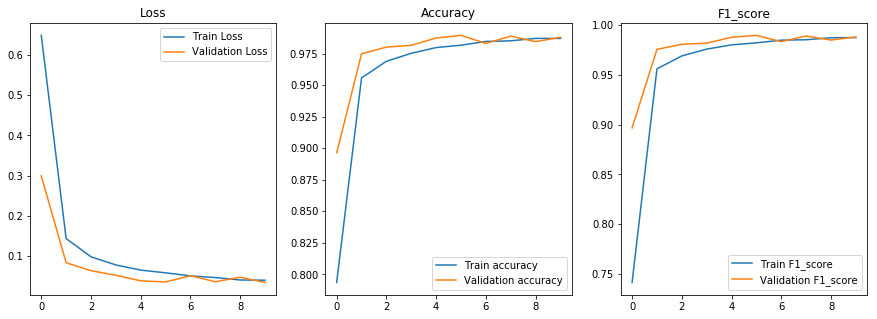

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0].set_title('Loss')
ax[0].plot(history.epoch, history.history["loss"], label="Train Loss")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation Loss")
ax[1].set_title('Accuracy')
ax[1].plot(history.epoch, history.history["acc"], label="Train accuracy")
ax[1].plot(history.epoch, history.history["val_acc"], label="Validation accuracy")
ax[2].set_title('F1_score')
ax[2].plot(history.epoch, history.history["f1"], label="Train F1_score")
ax[2].plot(history.epoch, history.history["val_f1"], label="Validation F1_score")
ax[0].legend()
ax[1].legend()
ax[2].legend()